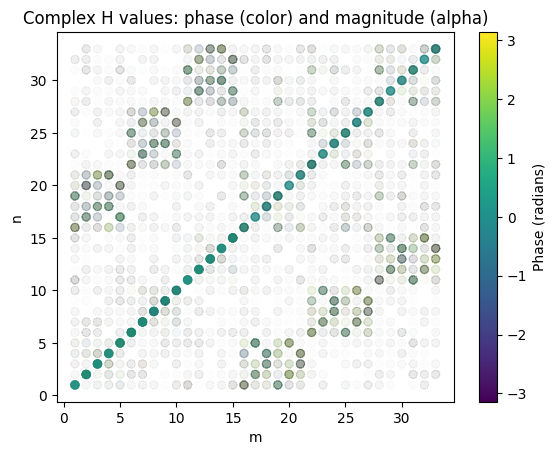

In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Read and parse the data
ms, ns, Hs = [], [], []
with open('t_Co_d_O_p.txt', 'r') as f:
    for line in f:
        match = re.search(r'm=(\d+)\s+n=(\d+)\s+H=([+-]?\d*\.?\d+(?:[eE][+-]?\d+)?)\s*\+\s*([+-]?\d*\.?\d+(?:[eE][+-]?\d+)?)\s*i', line)
        if match:
            m_val = int(match.group(1))
            n_val = int(match.group(2))
            real_part = float(match.group(3))
            imag_part = float(match.group(4))
            ms.append(m_val)
            ns.append(n_val)
            Hs.append(real_part + 1j * imag_part)

ms = np.array(ms)
ns = np.array(ns)
Hs = np.array(Hs)

# Compute magnitude and phase
mags = np.abs(Hs)
phases = np.angle(Hs)

# Normalize magnitude for alpha
alphas = mags / mags.max()

# Create scatter plot
plt.figure()
scatter = plt.scatter(ms, ns, c=phases, alpha=alphas)
plt.xlabel('m')
plt.ylabel('n')
plt.title('Complex H values: phase (color) and magnitude (alpha)')
plt.colorbar(scatter, label='Phase (radians)')
plt.show()
